Plot $\frac{p}{L} \left( z - 1 - \eta_0 \right)$ for various values of $p/L$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from punct_utils import nu

plt.style.use('default')
plt.rcParams['text.usetex'] = True

In [2]:
p = 100
betas = np.round(np.linspace(0.2, 2, 6), 2)

lenx = 100
leny = 4

In [3]:
def eta0(p, L, z, start=0., eps=1e-5, kind='trace', n=2000, limit=1000):
    if kind == 'trace':
        eigvals_circ = nu(L, 2*np.pi*np.arange(n)/n)
        func = lambda e0: np.mean(eigvals_circ**2/(eigvals_circ-p*(z-1+e0)))
    elif kind == 'integral':
        integ = lambda x, e0: nu(L, x)**2/(nu(L, x)-p*(z-1+e0))
        func_r = lambda e0: quad(lambda x: integ(x, e0).real, 0, 2*np.pi, limit=limit)[0]
        func_i = lambda e0: quad(lambda x: integ(x, e0).imag, 0, 2*np.pi, limit=limit)[0]
        func = lambda e0: (func_r(e0)+1j*func_i(e0))/(2*np.pi)
    else:
        raise NotImplementedError(kind)
    eta0p, eta0m = func(start), start
    while np.abs(eta0p-eta0m) > eps:
        eta0p, eta0m = func(eta0p), eta0p
    return eta0p

In [4]:
yr = np.round(np.linspace(1e-2, 1, 4), 2)
xr = np.linspace(-3, 8, 100)
zr = np.repeat(xr.reshape((-1, 1)), repeats=leny, axis=1)+1j*np.repeat(yr.reshape((1, -1)), repeats=lenx, axis=0)

In [5]:
eta0r = np.zeros((len(betas), lenx, leny), dtype='complex')
for k, beta in enumerate(betas):
    L = int(beta*p)
    for i in tqdm(range(lenx)):
        for j in range(leny):
            eta0r[k, i, j] = eta0(p, L, zr[i, j], start=eta0r[k, i-1, j], n=100000)
term = (zr-1+eta0r)/betas.reshape((-1, 1, 1))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.47it/s]


In [6]:
def plot(data, label):
    fig, ax = plt.subplots(2, 3, figsize=(18, 10))
    ax[0, 0].set_ylabel(label)
    ax[1, 0].set_ylabel(label)
    ax = ax.ravel()
    for k, beta in enumerate(betas):
        ax[k].plot(xr, data[k])
        ax[k].grid(ls=':')
        ax[k].set_xlabel("$\Re(z)$")
        ax[k].legend(["$\Im(z) = {}$".format(y) for y in yr])
        ax[k].set_title("$L/p = {}$".format(beta))
    plt.show()

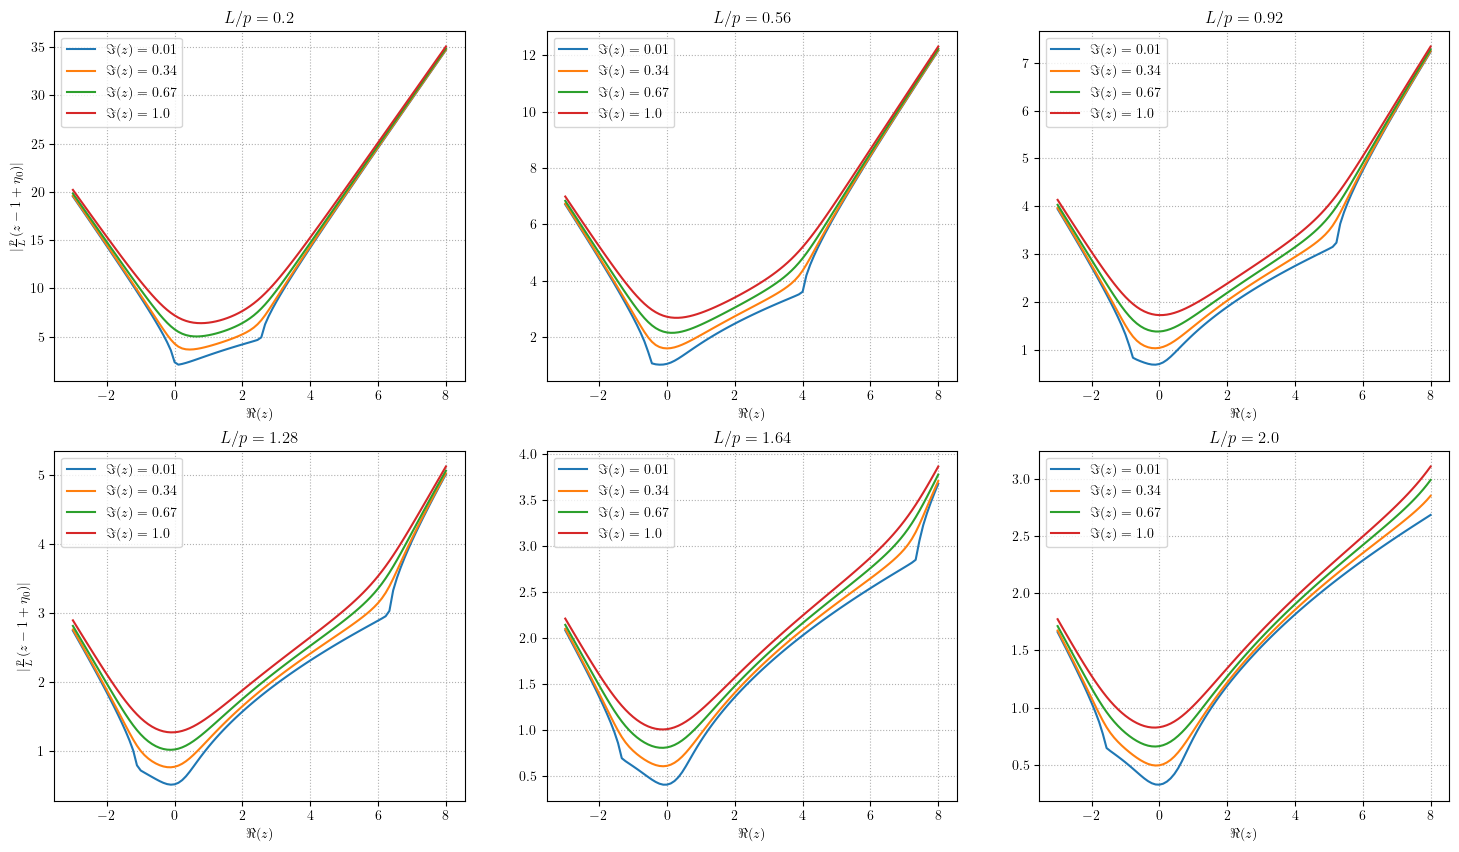

In [7]:
plot(np.abs(term), "$|\\frac{p}{L} (z-1+\eta_0)|$")

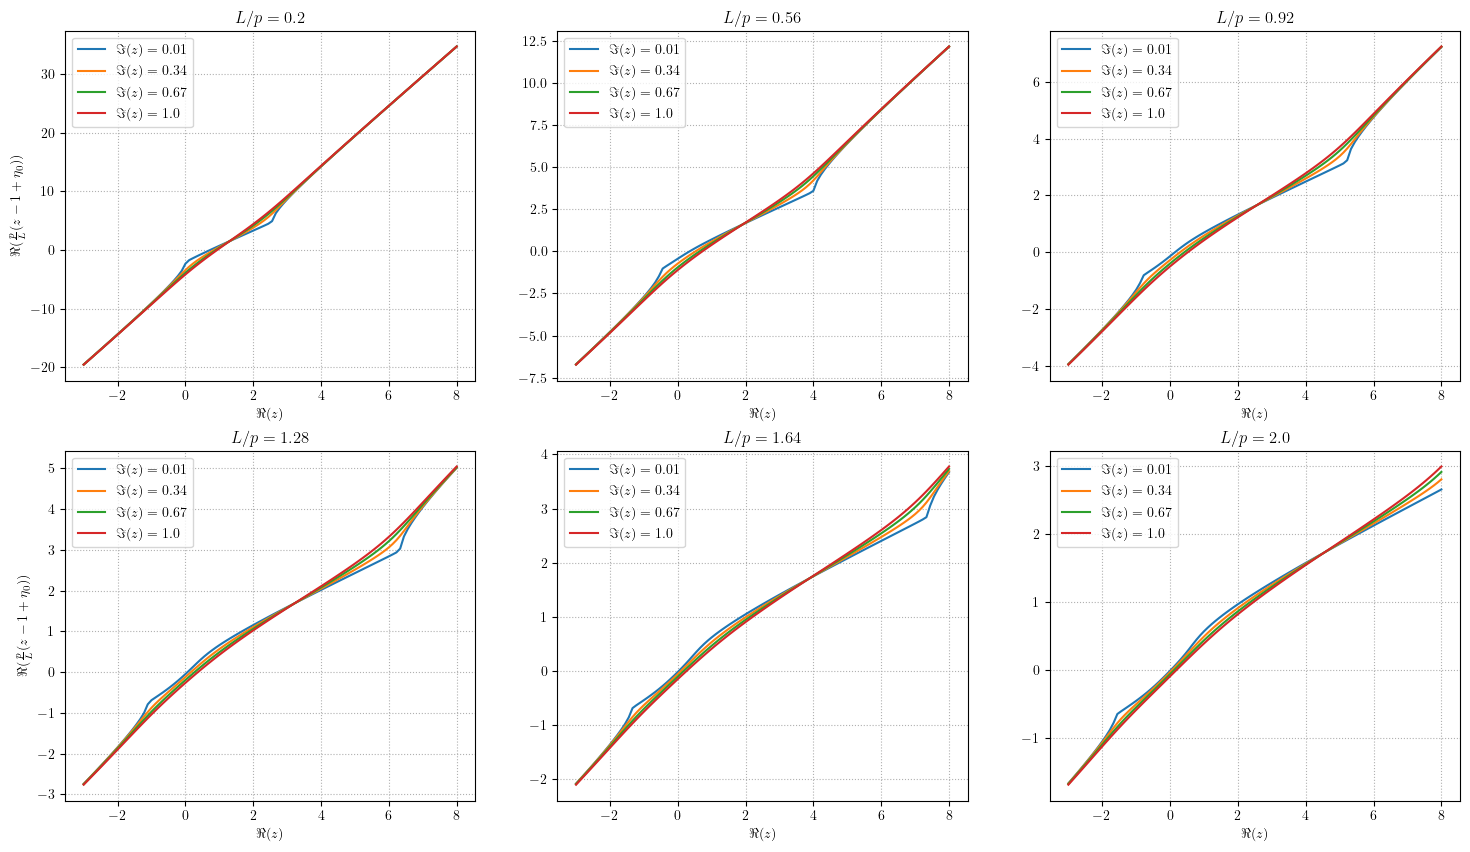

In [8]:
plot(term.real, "$\\Re(\\frac{p}{L} (z-1+\eta_0))$")

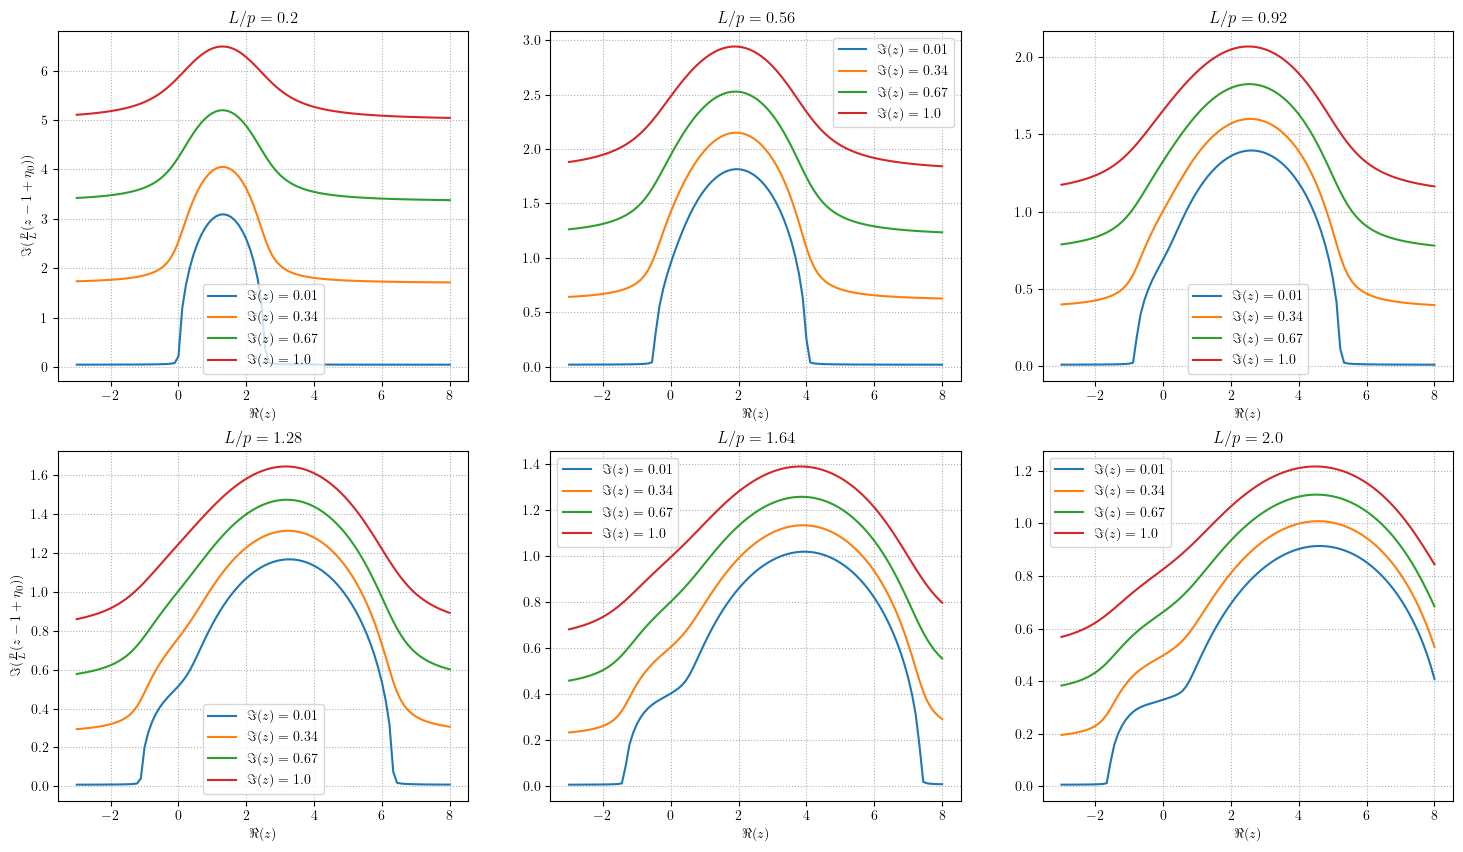

In [9]:
plot(term.imag, "$\\Im(\\frac{p}{L} (z-1+\eta_0))$")

In [37]:
beta = betas[-1]

In [38]:
L = int(p*beta)

In [39]:
nur = nu(L, np.linspace(0, 2*np.pi, 2000))

In [40]:
integrand = (nur**2/L)/(nur/L-term[-1, 0, 0])

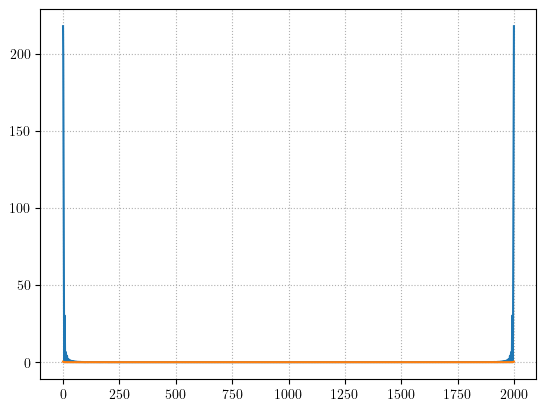

In [41]:
plt.plot(integrand.real)
plt.plot(integrand.imag)
plt.grid(ls=':')
plt.show()

In [42]:
np.sum(integrand)/1999

(0.7886567686430865+0.0016740757843792821j)

In [44]:
eta0r[-1, 0, 0]

(0.6797138863013676+0.0015026437862756582j)